# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:10px 10px;">Pandas Tips and Ticks</p>

<div class="alert alert-info" role="info">
Tricks with <b>emojis</b> must <b>NOT</b> be <b>missed</b>
</div>



<div class="alert alert-success" role="alert">

<p>
<li>The purpose of this NB is to showcase <b>top 20% tricks</b> that can help us in <b>80% of our Data analysis task</b> </li><br>
<li> I have added only the imp <b>Practical</b> Tips and Tricks from Pandas and not the fancy ones</li> <br>
<li> This NB is <b>not restricted</b> to only <b>optimized tips</b>, I have tried adding all imp. ones </li><br>
<li> I still feel there a tons of tricks I am unaware about, please feel free to suggest</li>
    
</p>
    
</div>

-----------
- with so many tips, there could be a possibility of a few mistakes, please share the feedback. I'll be happy to fix them

# TOC

- [display](#1)

- [☑️side-by-side Dataframes](#2)

- [Apply vs Applymap](#3)

- [🏆String "NA" = Null in read_csv](#3a)

- [Groupby-transform](#4)
    - [Applications of transform](#4.1)
    

- [Rank, diff, cumsum,cumcount, nth, nlargest, etc](#5)

- [Query and Eval](#6)

- [Insert & Assign](#7)

- [set-options, reset-options](#8)

- [🏅Get, Truncate](#9)

- [Shift, Rolling](#10)

- [Pandas - Data reading options](#11)

- [Crosstab vs Pivot_table](#12)

- [Explode, Expand, Melt](#13)

- [📌Groupby Tips](#14)
    - [Groupby - unique / set / list](#14.1)
    - [Groupby - filter](#14.2)
    - [Groupby - get-group](#14.3)
    - [Groupby-describe](#14.4)
    

- [Avoid multi-index in groupby](#15)

- [Progress apply](#16)

- [💥Filter](#16a)

- [Assignment vs Copy](#17)

- [Memory usage](#18)

- [Iterrows vs Itertuple](#19)

- [Where](#20)

- [💯Imp. params we generally miss](#21)
    - [value_counts(normalize = True)](#21.1)
    - [value_counts(dropna = False)](#21.2)
    - [confusion matrix(normalize = True)](#21.3)
    - [describe(category = True)](#21.4)
    - [merge indicator](#21.5)
    - [dropna with threhold](#21.6)
    - [Save compressed files](#21.7)
    
- [Sklearn datasets](#22)
    - [Real datasets](#22.1)
    - [Toy datasets](#22.2)
    - [Dummy data - for ML tasks](#22.3)

- [Pandas cut/qcut](#23)
    
- [pandas map](#24)

- [sort_index](#25) 

- [to-markdown, to-clipboard, to-dict](#26)

- [🎯Flattening a python list](#27)

- [Append](#28)

- [⚕️String vs object vs Category dtype](#29)

- [🔥Fuguesql : SQL in pandas](#30)

- [🚀Pandarallel](#31)

- [Dataframe - style](#32)

- [⚡Markdown](#33)

- [☑️Searborn formatting in Matplotlib plots](#34)

- [Pandas profiling](#35)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display

<a id = "1"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Display</p>

- Want to view both dataframes in 1 cell, **Dont use print, use display**

In [2]:
df1  = pd.DataFrame({"col1" : [1,2,3,4] , "col2" : list("abcd")})
df2  = pd.DataFrame({"col1" : [5,6,7,8] , "col2" : list("pqrs")})

display(df1.T)

display(df2.T)

,0,1,2,3
col1,1,2,3,4
col2,a,b,c,d


,0,1,2,3
col1,5,6,7,8
col2,p,q,r,s


<a id = "2"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">☑️Side by Side DataFrames</p>

- Latest Pandas updates have made it easy in displaying `side by side` dataframes 

In [3]:
from IPython.display import display_html 

In [4]:
df1  = pd.DataFrame({"col1" : [1,2,3,4] , "col2" : list("abcd")})
df2  = pd.DataFrame({"col1" : [5,6,7,8] , "col2" : list("pqrs")})

In [5]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption("df1")
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption("df2")

space = "\xa0" * 10

display_html(df1_styler._repr_html_()+ space + df2_styler._repr_html_(), raw=True)

,col1,col2
0,1,a
1,2,b
2,3,c
3,4,d
,col1,col2
0,5,p
1,6,q
2,7,r
3,8,s


<a id = "3"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Apply vs Applymap</p>



- We all know about **Apply**, what about **Applymap**

- The difference is simple 
    - `Apply :` works along an axis (either rows or cols)
    - `Applymap :` works across each element in dataframe

In [6]:
df = pd.DataFrame({"A" : ["abcd","pqr","fgd","a"], "B" : list("abcd")})
df

,A,B
0,abcd,a
1,pqr,b
2,fgd,c
3,a,d


#### Apply(axis = 0)
> **`calculates length across columns :: # rows`**

In [7]:
df.apply(len, axis = 0).to_frame()

,0
A,4
B,4


#### Apply(axis = 1)
> **`calculates length across rows :: # columns`**

In [8]:
df.apply(len, axis = 1).to_frame()

,0
0,2
1,2
2,2
3,2


#### Applymap
> **`Calculates length of each element in DF`**

In [9]:
df.applymap(len)

,A,B
0,4,1
1,3,1
2,3,1
3,1,1


<a id = "3a"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> 🏆String "NA" = Null in read_csv</p>

- One important thing to keep a note of in **Pandas.read_csv** method is `string values like"NA","#NA", etc` entries.
- These entries are read as **nulls (np.nan)** while we read a csv using pd.read_csv
- This is very imp to know else we might make mistake in our `feature engg.` process
-----------------

I have written about it earlier here
> https://www.kaggle.com/getting-started/304468

<a id = "4"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Groupby Transform</p>

- Have you used partitions in sql, transform does something like that

- for those who are not sql person, let me explain

`groupby-Transform` performs aggregations in `similar` manner as that of groupby but the output is shown at `index levels`

In [10]:
df = pd.DataFrame({"A" : list("aaabbc") , "B" : [1,2,3,4,5,6]})
df

,A,B
0,a,1
1,a,2
2,a,3
3,b,4
4,b,5
5,c,6


#### Groupby `without` Transforms

In [11]:
df.groupby("A")[["B"]].agg(len)

,B
A,
a,3
b,2
c,1


#### Groupby `with` Transforms

> **`Output is calculated at each index level`**

In [12]:
df["count_B"] = df.groupby("A")[["B"]].transform(len)
df[["A","count_B"]]

,A,count_B
0,a,3
1,a,3
2,a,3
3,b,2
4,b,2
5,c,1


<a id = "4.1"> </a>
#### Application of transform

- Lets discuss a couple of practical applications of `transform`

- **`% share` of col-B  grouped on col-A**

> This can also be done by calc the group mean first & then merging it back

In [13]:
print("Percentage share of col-B for each group in col-A")
df["col_B_perc"] = df["B"]*100/df.groupby("A")["B"].transform("sum")
df

Percentage share of col-B for each group in col-A


,A,B,count_B,col_B_perc
0,a,1,3,16.666667
1,a,2,3,33.333333
2,a,3,3,50.000000
3,b,4,2,44.444444
4,b,5,2,55.555556
5,c,6,1,100.000000


- **`Category mean` imputation in col-B**

> imputing the missing values in `column-B` with `grouped mean` (grouped on column-A categories)

In [14]:
print("Original frame")
df = pd.DataFrame({"A" : list("aaabbbcc") , "B" : [1,2,np.nan,4,5,np.nan,6,7]})
display(df)

print()

# imputing the values in column-B with mean of categories
print("Imputed frame")
df.groupby("A")[["B"]].transform(lambda x:x.fillna(x.mean()))

Original frame


,A,B
0,a,1.0
1,a,2.0
2,a,NaN
3,b,4.0
4,b,5.0
5,b,NaN
6,c,6.0
7,c,7.0



Imputed frame


,B
0,1.0
1,2.0
2,1.5
3,4.0
4,5.0
5,4.5
6,6.0
7,7.0


<a id = "5"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Rank, diff, cumsum,cumcount, nth, nlargest, etc</p> 

- One very common sql/python Data anlaysis question is **Ranking within a group [RWG]**
- As the name suggests, RWG ranks elements for each `category/group`

---------------------
one very popular interview questions on this concept 
> `For each quarter obtain the nth max sales  ?`

In [15]:
np.random.seed(123)

df = pd.DataFrame({"Quarter" : ("Q1 "*3+"Q2 "*3+"Q3 "*3+"Q4 "*3).split(),
                   "Month" : ["jan","feb", "mar","apr", "may" ,"june" 
                              ,"july" ,"aug" ,"sep" ,"oct","nov","dec"] 
                   , "Sale" : np.arange(12)*1000})
df

,Quarter,Month,Sale
0,Q1,jan,0
1,Q1,feb,1000
2,Q1,mar,2000
3,Q2,apr,3000
4,Q2,may,4000
5,Q2,june,5000
6,Q3,july,6000
7,Q3,aug,7000
8,Q3,sep,8000
9,Q4,oct,9000


<div class="alert alert-success" role="alert">
We are applying each function on <b> grouped data </b> (on Quarter) basis. However, they can be without any groupings too 
</div>

### cumcount : `for RWG`

- creates a `counter` on the data 
- used for calculating `rank` for each quarter

-----------
- since the `Sale` is already sorted we can directly use `cumcount`  for obtaining `rank`, else we need to sort data first

In [16]:
df["RWG_cumcount"] = df.groupby('Quarter').cumcount(ascending = True) + 1
df

,Quarter,Month,Sale,RWG_cumcount
0,Q1,jan,0,1
1,Q1,feb,1000,2
2,Q1,mar,2000,3
3,Q2,apr,3000,1
4,Q2,may,4000,2
5,Q2,june,5000,3
6,Q3,july,6000,1
7,Q3,aug,7000,2
8,Q3,sep,8000,3
9,Q4,oct,9000,1


### rank : `for RWG`
- calculates the `rank` for the given column (`sale`) for `each quarter`

-----------
**Method** arg settles ties:

- `average`: average rank of the group
- `min`: lowest rank in the group
- `max`: highest rank in the group
- `first`: ranks assigned in order they appear in the array
- `dense`: like ‘min’, but rank always increases by 1 between groups.

In [17]:
df["RWG_rank"] = df.groupby("Quarter")["Sale"].rank(method = "dense").astype(int)
df

,Quarter,Month,Sale,RWG_cumcount,RWG_rank
0,Q1,jan,0,1,1
1,Q1,feb,1000,2,2
2,Q1,mar,2000,3,3
3,Q2,apr,3000,1,1
4,Q2,may,4000,2,2
5,Q2,june,5000,3,3
6,Q3,july,6000,1,1
7,Q3,aug,7000,2,2
8,Q3,sep,8000,3,3
9,Q4,oct,9000,1,1


### n_largest
- Calculate the n-largest values
- In this case we are calculating upto `2nd-max` sale for `each Quarter`

In [18]:
df.groupby("Quarter")["Sale"].nlargest(2).to_frame()

Sale
Quarter          
Q1      2    2000
        1    1000
Q2      5    5000
        4    4000
Q3      8    8000
        7    7000
Q4      11  11000
        10  10000

### cumsum
- calculates `cumulative sum` for a column
- using it to calculate the `cumulative sale` for `each quarter`

In [19]:
df["cum_sale_quarter"] = df.groupby("Quarter")["Sale"].cumsum()
df[["Quarter","Sale","cum_sale_quarter"]]

,Quarter,Sale,cum_sale_quarter
0,Q1,0,0
1,Q1,1000,1000
2,Q1,2000,3000
3,Q2,3000,3000
4,Q2,4000,7000
5,Q2,5000,12000
6,Q3,6000,6000
7,Q3,7000,13000
8,Q3,8000,21000
9,Q4,9000,9000


### diff 
- diff calculates difference b/w **subsequent elements** in a column with specified **period**
- `diff` takes `period` as argument (1 in this case)

In [20]:
df["sale_inc_for_quarter_month"] = df.groupby("Quarter").Sale.diff(1)
df[["Quarter","Sale","sale_inc_for_quarter_month"]]

,Quarter,Sale,sale_inc_for_quarter_month
0,Q1,0,NaN
1,Q1,1000,1000.0
2,Q1,2000,1000.0
3,Q2,3000,NaN
4,Q2,4000,1000.0
5,Q2,5000,1000.0
6,Q3,6000,NaN
7,Q3,7000,1000.0
8,Q3,8000,1000.0
9,Q4,9000,NaN


<a id = "6"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Query and Eval</p>

#### Query and Eval are used for `data-filtering` and `data-transformations` in dataframe

- **Why Query & Eval**

> They offers a `cleaner interface` for writing conditions based on mulitple columns

> They offers `better performance` 

------------------

ref : https://queirozf.com/entries/pandas-query-examples-sql-like-syntax-queries-in-dataframes

### Query

- `Query` is used for filtering `dataframe` 
- Query also offers `cleaner interface`  & `better performance` compared to conventional pandas filtering

In [21]:
sales_data = pd.DataFrame({"company" : list("aabbc"),
                   "sales" : [100,200,300,400,500],
                   "date" : pd.date_range("2021-01-01", "2021-01-5")})
sales_data

,company,sales,date
0,a,100,2021-01-01
1,a,200,2021-01-02
2,b,300,2021-01-03
3,b,400,2021-01-04
4,c,500,2021-01-05


In [22]:
# using pandas default filtering 
print("filtering using pandas default method")
display(sales_data[(sales_data.company == "b") 
           & (sales_data.sales > 200) 
           & (sales_data.sales < 500)])


print()

# query code appears cleaner 
print("filtering using Query function")
display(sales_data.query("company == 'b' \
                         and sales > 200 \
                         and sales < 500"))

filtering using pandas default method


,company,sales,date
2,b,300,2021-01-03
3,b,400,2021-01-04



filtering using Query function


,company,sales,date
2,b,300,2021-01-03
3,b,400,2021-01-04


### Eval

- Eval is used for doing `transformations` on dataframe (unlike filtering in query)
- Uses similar backend as `query` 

------------

**Imp points**

> To benefit from using eval() you need to install `numexpr`

> You should `not` use eval() for simple expressions or for expressions involving small DataFrames. In fact, eval() is many orders of magnitude slower for smaller expressions/objects than plain ol’ Python. 

`A good rule of thumb is to only use eval() when you have a DataFrame with more than 10,000 rows.`

In [23]:
pip install numexpr -q

Note: you may need to restart the kernel to use updated packages.


In [24]:
sales_data = pd.DataFrame({"company" : list("aabbc"),
                   "sales" : [100,200,300,400,500],
                   "date" : pd.date_range("2021-01-01", "2021-01-5")})
sales_data

,company,sales,date
0,a,100,2021-01-01
1,a,200,2021-01-02
2,b,300,2021-01-03
3,b,400,2021-01-04
4,c,500,2021-01-05


In [25]:
print("adding constant to sales")

inc = 250
sales_data["sales_inc"] = sales_data.eval("sales + @inc")
sales_data

adding constant to sales


,company,sales,date,sales_inc
0,a,100,2021-01-01,350
1,a,200,2021-01-02,450
2,b,300,2021-01-03,550
3,b,400,2021-01-04,650
4,c,500,2021-01-05,750


### Query and Eval Tips

- All `commands` and `operator` shown below for `Query` can be used for `Eval` too

In [26]:
# built in functions - for query
print("built in functions - for query")
display(sales_data.query("sqrt(sales) > 20"))

built in functions - for query


,company,sales,date,sales_inc
4,c,500,2021-01-05,750


In [27]:
# using date `dt` accessors
print("using date `dt` accessors")
display(sales_data.query("date.dt.day > 2"))


using date `dt` accessors


,company,sales,date,sales_inc
2,b,300,2021-01-03,550
3,b,400,2021-01-04,650
4,c,500,2021-01-05,750


In [28]:
# using @ for condition basis some variable
print("using `@` for condition basis some variable")
sales_cut = 300
display(sales_data.query("sales > @sales_cut"))


using `@` for condition basis some variable


,company,sales,date,sales_inc
3,b,400,2021-01-04,650
4,c,500,2021-01-05,750


In [29]:
# using `not` for negation for a condition
print("using `not` for negation for a condition")
sales_cut = 300
display(sales_data.query("not(sales > @sales_cut)"))

using `not` for negation for a condition


,company,sales,date,sales_inc
0,a,100,2021-01-01,350
1,a,200,2021-01-02,450
2,b,300,2021-01-03,550


<a id = "7"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Insert & Assign</p>

### Insert

- By default pandas would add the columns to the `extreme right` in a DF. 
- If we want to add the column in a particular index, we can use **insert**

In [30]:
df = pd.DataFrame({"A" : list("abcd"), "B" : [3,5,6,6]})
df

,A,B
0,a,3
1,b,5
2,c,6
3,d,6


In [31]:
# adding column C to index 1 (2nd position) 
df.insert(1,"C", df.B + 1)

print("column C added to index 1 (2nd position)")
df

column C added to index 1 (2nd position)


,A,C,B
0,a,4,3
1,b,6,5
2,c,7,6
3,d,7,6


### Assign

- Assign lets you create `multiple columns` within the same assign command
- Creates a new DataFrame with the `new columns` in addition to all the `existing columns`

In [32]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [33]:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
          temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


<a id = "8"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> set-options, reset-options</p>

- Okay, lets say you have too many columns and rows and you wanna view them all at once
- One option could be to use **pandas.set_options**

In [34]:
# default basis the editor
df = pd.DataFrame(np.random.rand(100,50))
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118,...,0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895
1,0.120629,0.826341,0.603060,0.545068,0.342764,0.304121,0.417022,0.681301,0.875457,0.510422,...,0.704959,0.995358,0.355915,0.762548,0.593177,0.691702,0.151127,0.398876,0.240856,0.343456
2,0.513128,0.666625,0.105908,0.130895,0.321981,0.661564,0.846506,0.553257,0.854452,0.384838,...,0.093327,0.296861,0.927584,0.569004,0.457412,0.753526,0.741862,0.048579,0.708697,0.839243
3,0.165938,0.780998,0.286537,0.306470,0.665261,0.111392,0.664872,0.887857,0.696311,0.440328,...,0.206096,0.717758,0.378986,0.668384,0.029320,0.635900,0.032198,0.744781,0.472913,0.121754
4,0.542636,0.066774,0.653365,0.996086,0.769397,0.573774,0.102635,0.699834,0.661168,0.049097,...,0.005545,0.484909,0.988329,0.375186,0.097038,0.461909,0.963004,0.341831,0.798923,0.798846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.346546,0.714507,0.565773,0.090043,0.387813,0.036648,0.378278,0.923960,0.629258,0.712827,...,0.652378,0.986366,0.951469,0.073092,0.180503,0.145742,0.503896,0.402159,0.789268,0.198252
96,0.100919,0.630347,0.178372,0.809501,0.264291,0.389122,0.345413,0.947851,0.259230,0.420737,...,0.563739,0.457503,0.960012,0.783858,0.352651,0.466005,0.516062,0.206890,0.132482,0.154532
97,0.364028,0.092625,0.197204,0.102603,0.015746,0.393342,0.445292,0.746421,0.567032,0.858015,...,0.080993,0.032176,0.787056,0.106777,0.256806,0.098337,0.961458,0.331640,0.236014,0.717195
98,0.649866,0.342942,0.559755,0.626756,0.413986,0.802807,0.749831,0.854694,0.094223,0.583519,...,0.440431,0.776809,0.149785,0.209507,0.588881,0.104398,0.669951,0.320636,0.894818,0.628666


### Set_option
- **`Lets change the default value`**

In [35]:
# there are many other options to choose from!
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [36]:
# output after changing defaults
print("We can see all 50 cols since limit is 100")
df

We can see all 50 cols since limit is 100


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118,0.343178,0.729050,0.438572,0.059678,0.398044,0.737995,0.182492,0.175452,0.531551,0.531828,0.634401,0.849432,0.724455,0.611024,0.722443,0.322959,0.361789,0.228263,0.293714,0.630976,0.092105,0.433701,0.430863,0.493685,0.425830,0.312261,0.426351,0.893389,0.944160,0.501837,0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895
1,0.120629,0.826341,0.603060,0.545068,0.342764,0.304121,0.417022,0.681301,0.875457,0.510422,0.669314,0.585937,0.624904,0.674689,0.842342,0.083195,0.763683,0.243666,0.194223,0.572457,0.095713,0.885327,0.627249,0.723416,0.016129,0.594432,0.556785,0.158960,0.153071,0.695530,0.318766,0.691970,0.554383,0.388951,0.925132,0.841670,0.357398,0.043591,0.304768,0.398186,0.704959,0.995358,0.355915,0.762548,0.593177,0.691702,0.151127,0.398876,0.240856,0.343456
2,0.513128,0.666625,0.105908,0.130895,0.321981,0.661564,0.846506,0.553257,0.854452,0.384838,0.316788,0.354265,0.171082,0.829113,0.338671,0.552370,0.578551,0.521533,0.002688,0.988345,0.905342,0.207636,0.292489,0.520010,0.901911,0.983631,0.257542,0.564359,0.806969,0.394370,0.731073,0.161069,0.600699,0.865864,0.983522,0.079366,0.428347,0.204543,0.450636,0.547764,0.093327,0.296861,0.927584,0.569004,0.457412,0.753526,0.741862,0.048579,0.708697,0.839243
3,0.165938,0.780998,0.286537,0.306470,0.665261,0.111392,0.664872,0.887857,0.696311,0.440328,0.438214,0.765096,0.565642,0.084904,0.582671,0.814844,0.337066,0.927577,0.750717,0.574064,0.751644,0.079149,0.859389,0.821504,0.909872,0.128631,0.081780,0.138416,0.399379,0.424307,0.562218,0.122244,0.201400,0.811644,0.467988,0.807938,0.007426,0.551593,0.931932,0.582175,0.206096,0.717758,0.378986,0.668384,0.029320,0.635900,0.032198,0.744781,0.472913,0.121754
4,0.542636,0.066774,0.653365,0.996086,0.769397,0.573774,0.102635,0.699834,0.661168,0.049097,0.792299,0.518717,0.425868,0.788187,0.411569,0.481026,0.181629,0.321319,0.845533,0.186904,0.417291,0.989035,0.236600,0.916832,0.918397,0.091296,0.463653,0.502216,0.313669,0.047340,0.241686,0.095530,0.238250,0.807791,0.894978,0.043223,0.301947,0.980582,0.539505,0.626309,0.005545,0.484909,0.988329,0.375186,0.097038,0.461909,0.963004,0.341831,0.798923,0.798846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.346546,0.714507,0.565773,0.090043,0.387813,0.036648,0.378278,0.923960,0.629258,0.712827,0.293351,0.683111,0.959315,0.738755,0.856778,0.146648,0.496126,0.200728,0.587048,0.628225,0.060718,0.975906,0.753357,0.651388,0.326540,0.366508,0.066663,0.124694,0.373555,0.770686,0.734755,0.190918,0.283331,0.059873,0.719405,0.929081,0.432348,0.265327,0.231885,0.782896,0.652378,0.986366,0.951469,0.073092,0.180503,0.145742,0.503896,0.402159,0.789268,0.198252
96,0.100919,0.630347,0.178372,0.809501,0.264291,0.389122,0.345413,0.947851,0.259230,0.420737,0.409857,0.850917,0.816870,0.853215,0.624176,0.252013,0.197103,0.118756,0.571521,0.386850,0.055075,0.712124,0.462887,0.058755,0.442534,0.947134,0.177981,0.638792,0.427361,0.329256,0.150662,0.379095,0.026529,0.372233,0.565436,0.333025,0.152820,0.431809,0.357361,0.983442,0.563739,0.457503,0.960012,0.783858,0.352651,0.466005,0.516062,0.206890,0.132482,0.154532
97,0.364028,0.092625,0.197204,0.102603,0.015746,0.393342,0.445292,0.746421,0.567032,0.858015,0.686108,0.817789,0.565750,0.529452,0.967065,0.413119,0.524939,0.699063,0.486123,0.418299,0.667704,0.048103,0.858792,0.977342,0.613417,0.468469,0.453252,0.562668,0.729776,0.299162,0.316847,0.137602,0.727483,0.372702,0.836215,0.480704,0.113922,0.999890,0.817525,0.269669,0.080993,0.032176,0.787056,0.106777,0.256806,0.098337,0.961458,0.331640,0.236014,0.717195
98,0.649866,0.342942,0.559755,0.6267

### Reset_option
- **`Reset the value to default`**

In [37]:
pd.reset_option('display.max_columns')

In [38]:
print("We are back to default # column view")
df

We are back to default # column view


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118,...,0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895
1,0.120629,0.826341,0.603060,0.545068,0.342764,0.304121,0.417022,0.681301,0.875457,0.510422,...,0.704959,0.995358,0.355915,0.762548,0.593177,0.691702,0.151127,0.398876,0.240856,0.343456
2,0.513128,0.666625,0.105908,0.130895,0.321981,0.661564,0.846506,0.553257,0.854452,0.384838,...,0.093327,0.296861,0.927584,0.569004,0.457412,0.753526,0.741862,0.048579,0.708697,0.839243
3,0.165938,0.780998,0.286537,0.306470,0.665261,0.111392,0.664872,0.887857,0.696311,0.440328,...,0.206096,0.717758,0.378986,0.668384,0.029320,0.635900,0.032198,0.744781,0.472913,0.121754
4,0.542636,0.066774,0.653365,0.996086,0.769397,0.573774,0.102635,0.699834,0.661168,0.049097,...,0.005545,0.484909,0.988329,0.375186,0.097038,0.461909,0.963004,0.341831,0.798923,0.798846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.346546,0.714507,0.565773,0.090043,0.387813,0.036648,0.378278,0.923960,0.629258,0.712827,...,0.652378,0.986366,0.951469,0.073092,0.180503,0.145742,0.503896,0.402159,0.789268,0.198252
96,0.100919,0.630347,0.178372,0.809501,0.264291,0.389122,0.345413,0.947851,0.259230,0.420737,...,0.563739,0.457503,0.960012,0.783858,0.352651,0.466005,0.516062,0.206890,0.132482,0.154532
97,0.364028,0.092625,0.197204,0.102603,0.015746,0.393342,0.445292,0.746421,0.567032,0.858015,...,0.080993,0.032176,0.787056,0.106777,0.256806,0.098337,0.961458,0.331640,0.236014,0.717195
98,0.649866,0.342942,0.559755,0.626756,0.413986,0.802807,0.749831,0.854694,0.094223,0.583519,...,0.440431,0.776809,0.149785,0.209507,0.588881,0.104398,0.669951,0.320636,0.894818,0.628666


- **`Another very useful trick!`**

> Whenever a dataframe has 60+ rows, we can fix the minimum no. of rows to view by use **min_row** instead of calling `df.head` everytime `(saves space)!!`

In [39]:
pd.set_option("min_rows" , 3)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.684830,0.480932,0.392118,...,0.623953,0.115618,0.317285,0.414826,0.866309,0.250455,0.483034,0.985560,0.519485,0.612895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.441652,0.541723,0.227858,0.034237,0.055636,0.400993,0.847721,0.691197,0.643445,0.952851,...,0.494334,0.973342,0.255428,0.079483,0.842864,0.501648,0.357406,0.431624,0.942710,0.043993


<a id = "9"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🏅Get, Truncate</p>

### Get

- Get item from object for given key (ex: `DataFrame column`)
- Returns `default value` if not found

--------------------

- `Get` can be very `handy` (in production systems) where we might `not get some columns` in data because of some issues
- `Get` does not return `error` but a `deatult` value

--------------------

- **Get `for pandas dataframe`**

In [41]:
df = pd.DataFrame(
    [
        [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"],
    index=pd.date_range(start="2014-02-12", end="2014-02-15", freq="D"),
)

df

,temp_celsius,temp_fahrenheit,windspeed
2014-02-12,24.3,75.7,high
2014-02-13,31.0,87.8,high
2014-02-14,22.0,71.6,medium
2014-02-15,35.0,95.0,medium


In [42]:
df.get(["temp_celsius", "windspeed"])

,temp_celsius,windspeed
2014-02-12,24.3,high
2014-02-13,31.0,high
2014-02-14,22.0,medium
2014-02-15,35.0,medium


In [43]:
print("returns default_value if column is not present")
df.get(["temp_celsius", "temp_kelvin"], default="default_value")

returns default_value if column is not present


'default_value'

- **Get `for dictionary`**

In [44]:
dict_ = {"A" : "abcd", "B" : [5,6,7,8] , "C" : [1,2,3,4]}
dict_

{'A': 'abcd', 'B': [5, 6, 7, 8], 'C': [1, 2, 3, 4]}

In [45]:
dict_.get("Q", "default")

'default'

### Truncate

- `Truncate` a Series or DataFrame `before` and `after` some index value.
- This is a useful shorthand for boolean indexing based on index values above or below certain thresholds

---------------

> `Truncate` is really helpful to filter incase of large number of columns 

In [46]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [47]:
print("Truncating rows before index 2 and after index 4")
df.truncate(before=2, after=4 , axis = "rows")

Truncating rows before index 2 and after index 4


,A,B,C
2,b,g,l
3,c,h,m
4,d,i,n


In [48]:
print("Truncating columns before col-A and after col-B")
df.truncate(before="A", after="B", axis="columns")

Truncating columns before col-A and after col-B


,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


<a id = "10"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Shift, Rolling</p>


### Shift

-------------
- **Shift** index by desired number of **periods** with an optional time **freq**

- **period** : Number of periods to shift. Can be positive or negative. 
- **freq** : Offset to use from the tseries module or time rule (e.g. ‘EOM’)

In [49]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [50]:
print("shifting each row by 3 indexes downwards")
df.shift(periods=3)

shifting each row by 3 indexes downwards


,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,10.0,13.0,17.0
2020-01-05,20.0,23.0,27.0


In [51]:
print("shifting each column by 1 index left")
df.shift(periods=1, axis="columns")

shifting each column by 1 index left


,Col1,Col2,Col3
2020-01-01,NaN,10,13
2020-01-02,NaN,20,23
2020-01-03,NaN,15,18
2020-01-04,NaN,30,33
2020-01-05,NaN,45,48


In [52]:
print("shifting rows down while filling nulls with 0")
df.shift(periods=3, fill_value=0)

shifting rows down while filling nulls with 0


,Col1,Col2,Col3
2020-01-01,0,0,0
2020-01-02,0,0,0
2020-01-03,0,0,0
2020-01-04,10,13,17
2020-01-05,20,23,27


In [53]:
print("shifting rows. to 3rd day after the given day")
df.shift(periods=3, freq="D")

shifting rows. to 3rd day after the given day


,Col1,Col2,Col3
2020-01-04,10,13,17
2020-01-05,20,23,27
2020-01-06,15,18,22
2020-01-07,30,33,37
2020-01-08,45,48,52


### Rolling

- Provide **rolling window** calculations

----------------------
- Rolling offers a lot of other features suitable for timeseries https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [54]:
df = pd.DataFrame({'B': range(10)})
df

,B
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


- **`window`** : Size of the moving window

In [55]:
print("rolling sum")
df.rolling(window  = 3).sum()

rolling sum


,B
0,NaN
1,NaN
2,3.0
3,6.0
4,9.0
5,12.0
6,15.0
7,18.0
8,21.0
9,24.0


- **`min_periods`** : Minimum number of observations in window required to have a value; otherwise, result is np.nan

In [56]:
print("rolling sum with min_period size  = 1")
df.rolling(2, min_periods=1).sum()

rolling sum with min_period size  = 1


,B
0,0.0
1,1.0
2,3.0
3,5.0
4,7.0
5,9.0
6,11.0
7,13.0
8,15.0
9,17.0


<a id = "11"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas - Data reading options</p>

While reading the csv there are a ton of options that can make our lives easy!

- nrows
- usecols
- skiprows
- dtype
- on_bad_lines

In [57]:
nrows, ncols  = (1000,100)
df = pd.DataFrame(np.random.rand(nrows, ncols),
                  columns = ["C"+str(i) for i in range(ncols)])

df.reset_index(inplace = True)

df.rename(columns = {"index" : "index_val"}, inplace = True)
df["test_date"] = "2021-01-01"

df.to_csv("data_test.csv", index = False)

### nrows : 
> Want `top N` rows only : incase if  DF has huge number of rows

In [58]:
df = pd.read_csv("data_test.csv", nrows = 2, )
df.head()

,index_val,C0,C1,C2,C3,C4,C5,C6,C7,C8,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,test_date
0,0,0.541305,0.225178,0.837665,0.580742,0.493181,0.605737,0.334417,0.804798,0.590833,...,0.702690,0.497413,0.318578,0.087522,0.173762,0.270780,0.486577,0.936690,0.339587,2021-01-01
1,1,0.356803,0.713634,0.485316,0.282489,0.156112,0.038677,0.221224,0.922293,0.993845,...,0.249965,0.608530,0.039497,0.324395,0.469977,0.206511,0.672469,0.368121,0.188033,2021-01-01


### skiprows
>  filter rows basis some condition

> Filtering `every third` row in data till 100th row

In [59]:
df = pd.read_csv("data_test.csv", skiprows = list(range(1,100,3)))
df

,index_val,C0,C1,C2,C3,C4,C5,C6,C7,C8,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,test_date
0,1,0.356803,0.713634,0.485316,0.282489,0.156112,0.038677,0.221224,0.922293,0.993845,...,0.249965,0.608530,0.039497,0.324395,0.469977,0.206511,0.672469,0.368121,0.188033,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,999,0.215355,0.254295,0.843544,0.852305,0.566855,0.857166,0.017831,0.931523,0.026733,...,0.011870,0.241897,0.727753,0.366448,0.020627,0.739266,0.627103,0.689340,0.941275,2021-01-01


### usecols
> Lets you select required columns

In [60]:
df = pd.read_csv("data_test.csv", usecols = ["C1",'C2','C5','C6'])
df.head()

,C1,C2,C5,C6
0,0.225178,0.837665,0.605737,0.334417
1,0.713634,0.485316,0.038677,0.221224
2,0.200542,0.576109,0.236691,0.820167
3,0.702361,0.329860,0.483215,0.958155
4,0.966630,0.035924,0.105051,0.810885


### dtype

> Assign datatype to a column before loading data

In [61]:
df = pd.read_csv("data_test.csv", usecols = ["C1",'C2','C5','C6',"test_date"],
                 dtype = {"C2" : "object"} )
df

,C1,C2,C5,C6,test_date
0,0.225178,0.8376645781620914,0.605737,0.334417,2021-01-01
...,...,...,...,...,...
999,0.254295,0.8435439592012727,0.857166,0.017831,2021-01-01


### on_bad_lines {'error', 'warn', 'skip'}, default 'error'
----------
- Specifies what to do upon encountering a `bad line` (a line with too many fields).

- Allowed values are :
    - 'error', raise an Exception when a bad line is encountered.
    - 'warn', raise a warning when a bad line is encountered and skip that line.
    - 'skip', skip bad lines without raising or warning when they are encountered.

<a id = "12"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Crosstab vs Pivot_table</p>

In [62]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "category" : list("P"*6 + "Q"*4),
                   "sales" : np.arange(10)**2,
                   "profits" : np.arange(10)})
df

,company,category,sales,profits
0,a,P,0,0
1,a,P,1,1
2,a,P,4,2
3,b,P,9,3
4,b,P,16,4
5,b,P,25,5
6,c,Q,36,6
7,c,Q,49,7
8,d,Q,64,8
9,d,Q,81,9


### Pivottable

- Create a `spreadsheet-style pivot table` as a DataFrame (to compare data across 2 or more cols)

-------------

- Takes in a Dataframe as input
- Has **fill_value** which crosstab lacks

In [63]:
df.pivot_table(index = "category" ,
               columns = "company" ,
               aggfunc = "sum",
               values = "sales" ,
               fill_value = 0)

company,a,b,c,d
category,,,,
P,5,50,0,0
Q,0,0,85,145


### Crosstab

- Compute a simple `cross tabulation of two (or more) factors`
- By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

--------------
- Takes in multiple arrays/series as input
- Has **normalizing** feature which pivot lacks

In [64]:
print("crosstab : non-normalized")
display(pd.crosstab(index = df.category, 
                    columns = df.company ,
                    aggfunc= "sum" , values = df.sales))

crosstab : non-normalized


company,a,b,c,d
category,,,,
P,5.0,50.0,NaN,NaN
Q,NaN,NaN,85.0,145.0


In [65]:
print("crosstab : normalized")
display(pd.crosstab(index = df.category,
                    columns = df.company ,
                    aggfunc= "sum" ,
                    values = df.sales ,
                    normalize = "index"))

crosstab : normalized


company,a,b,c,d
category,,,,
P,0.090909,0.909091,0.000000,0.000000
Q,0.000000,0.000000,0.369565,0.630435


In [66]:
# example for using multi-index in crosstab [example could have been better, I know!]
print("crosstab : multiple index")
display(pd.crosstab(index  = [df.category,df.company],
                    columns = df.company,
                    aggfunc= "sum",
                    values = df.sales))

crosstab : multiple index


company             a     b     c      d
category company                        
P        a        5.0   NaN   NaN    NaN
         b        NaN  50.0   NaN    NaN
Q        c        NaN   NaN  85.0    NaN
         d        NaN   NaN   NaN  145.0

<a id = "13"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Explode, Expand , Melt</p>

- table showing - students and their `marks in 5 tests`(with nulls) stored as comma-sep values

In [67]:
import pandas as pd
import numpy as np

In [68]:
df =  pd.DataFrame({"student" : list("ABCDEF") ,
                    "marks" : ["1,2,3", "5,3,6,7" , "8,9,4,4,1" , "1,4,5" , "4,3" , "1,2"]})
df

,student,marks
0,A,"1,2,3"
1,B,"5,3,6,7"
2,C,"8,9,4,4,1"
3,D,"1,4,5"
4,E,"4,3"
5,F,"1,2"


### Expand 
- Expand the `split strings` into `separate columns`
- can be used to `seperate marks` obtained for each subject in `difference columns`

In [69]:
print("Dataframe with marks seperated for each subject")

# expand to seperate the marks in diff cols
df_marks = df.marks.str.split(pat = ",",expand = True)

# renaming cols
df_marks.columns = ["marks_"+str(i) for i in range(5)]
df_marks

Dataframe with marks seperated for each subject


,marks_0,marks_1,marks_2,marks_3,marks_4
0,1,2,3,None,None
1,5,3,6,7,None
2,8,9,4,4,1
3,1,4,5,None,None
4,4,3,None,None,None
5,1,2,None,None,None


- <u> Convert the marks dataframe back to original marks column </u>

In [70]:
df_marks.apply(lambda ser: ",".join([x for x in ser if x is not None]), axis = 1).to_frame()

,0
0,"1,2,3"
1,"5,3,6,7"
2,"8,9,4,4,1"
3,"1,4,5"
4,"4,3"
5,"1,2"


### Explode
- Transform each element of a list-like to a row, replicating index values.

In [71]:
df =  pd.DataFrame({"student" : list("ABCDEF") ,
                    "marks" : ["1,2", "5,3" , "8,9" , "1" , "4" , "1,2"]})

df["marks"] = df.marks.str.split(",")

df

,student,marks
0,A,"[1, 2]"
1,B,"[5, 3]"
2,C,"[8, 9]"
3,D,[1]
4,E,[4]
5,F,"[1, 2]"


In [72]:
print("explode - for each value in list a row level entry is added")
df_exploded = df.explode("marks")
df_exploded

explode - for each value in list a row level entry is added


,student,marks
0,A,1
0,A,2
1,B,5
1,B,3
2,C,8
2,C,9
3,D,1
4,E,4
5,F,1
5,F,2


- <u> Convert the df_exploded dataframe back to original marks column </u>

In [73]:
df_exploded.groupby("student").agg({"marks":list})

,marks
student,
A,"[1, 2]"
B,"[5, 3]"
C,"[8, 9]"
D,[1]
E,[4]
F,"[1, 2]"


### Melt

- Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

In [74]:
df = pd.DataFrame({"student" : list("abcd") ,"test1" : [1,2,3,7], "test2" : [3,4,5,4] , "test3" : [6,5,3,6]})

print("dataframe storing marks for each student for 3 diff tests")
display(df)

dataframe storing marks for each student for 3 diff tests


,student,test1,test2,test3
0,a,1,3,6
1,b,2,4,5
2,c,3,5,3
3,d,7,4,6


In [75]:
print("getting marks in all test for each student in row-wise manner")
df_melt = df.melt("student").sort_values("student")
display(df_melt)

getting marks in all test for each student in row-wise manner


,student,variable,value
0,a,test1,1
4,a,test2,3
8,a,test3,6
1,b,test1,2
5,b,test2,4
9,b,test3,5
2,c,test1,3
6,c,test2,5
10,c,test3,3
3,d,test1,7


- <u> convert the df_melt dataframe back to original marks column </u>

In [76]:
df_melt.pivot_table(index  = "student", columns = "variable").reset_index()

student value            
variable         test1 test2 test3
0              a     1     3     6
1              b     2     4     5
2              c     3     5     3
3              d     7     4     6

<a id = "14"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📌Groupby Tips</p> 
  
- Let's discuss some groupby tips that can help our Data analysis process

In [77]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "sales" : np.square([1,2,2,3,4,4,6,6,7,8]),
                   "profits" : [1,2,2,3,4,4,6,6,7,8]})
df

,company,sales,profits
0,a,1,1
1,a,4,2
2,a,4,2
3,b,9,3
4,b,16,4
5,b,16,4
6,c,36,6
7,c,36,6
8,d,49,7
9,d,64,8


<a id = "14.1"> </a>
### Groupby - unique / set / list

**groupby - Set**
- obtain `unique values` in `sales` for each category in `company`
- using **set** : order does not remain same in values

In [78]:
# unique sales and profit values for each company
print("# unique sales values for each company - using set")
display(df.groupby("company").agg({"sales" : set}))

# unique sales values for each company - using set


,sales
company,
a,"{1, 4}"
b,"{16, 9}"
c,{36}
d,"{64, 49}"


**groupby - unique**
- obtain `unique values` in `sales` for a category in `company`
- using **unique** : order remain same in values

In [79]:
print("# unique sales values for each company - Using pd.unique")
display(df.groupby("company").agg({"sales" : "unique"}))

# unique sales values for each company - Using pd.unique


,sales
company,
a,"[1, 4]"
b,"[9, 16]"
c,[36]
d,"[49, 64]"


**groupby - list**
- calculate `All values` in `sales` for a category in `company`
- using **list** we get all non-unique entries in a group too

In [80]:
print("all sales values for each company - Using list")
display(df.groupby("company").agg({"sales" : list}))

all sales values for each company - Using list


,sales
company,
a,"[1, 4, 4]"
b,"[9, 16, 16]"
c,"[36, 36]"
d,"[49, 64]"


<a id = "14.2"> </a>
### Groupby - filter

- Filters groups based on group statistic (ex: `mean` in this case)

In [81]:
print("Filtering groups with group mean > 10")
grouped = df.groupby("company")
grouped.filter(lambda x: x['sales'].mean() > 10)

Filtering groups with group mean > 10


,company,sales,profits
3,b,9,3
4,b,16,4
5,b,16,4
6,c,36,6
7,c,36,6
8,d,49,7
9,d,64,8


<a id = "14.3"> </a>
### Groupby - get-group

- We can `get` the data for any group 

In [82]:
print("getting groups where company == b")
df.groupby("company").get_group("b")

getting groups where company == b


,company,sales,profits
3,b,9,3
4,b,16,4
5,b,16,4


<a id = "14.4"> </a>
### Groupby-describe
- we all know how **df.groupby** works and also how **df.describe** works
- let's try both of them together

In [83]:
print("Gives statistics for each group (company)")
df.groupby("company").describe()

Gives statistics for each group (company)


sales                                                       profits                      \
        count       mean        std   min    25%   50%    75%   max   count      mean       std   
company                                                                                           
a         3.0   3.000000   1.732051   1.0   2.50   4.0   4.00   4.0     3.0  1.666667  0.577350   
b         3.0  13.666667   4.041452   9.0  12.50  16.0  16.00  16.0     3.0  3.666667  0.577350   
c         2.0  36.000000   0.000000  36.0  36.00  36.0  36.00  36.0     2.0  6.000000  0.000000   
d         2.0  56.500000  10.606602  49.0  52.75  56.5  60.25  64.0     2.0  7.500000  0.707107   

                                    
         min   25%  50%   75%  max  
company                             
a        1.0  1.50  2.0  2.00  2.0  
b        3.0  3.50  4.0  4.00  4.0  
c        6.0  6.00  6.0  6.00  6.0  
d        7.0  7.25  7.5  7.75  8.0

<a id = "15"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Avoid multi-index in groupby</p> 

In [84]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "sales" : np.arange(10)**2,
                   "profits" : np.arange(10)})
df

,company,sales,profits
0,a,0,0
1,a,1,1
2,a,4,2
3,b,9,3
4,b,16,4
5,b,25,5
6,c,36,6
7,c,49,7
8,d,64,8
9,d,81,9


- Using `named_tuples` shown below we can get rid of multi-index in groupby

In [85]:
df.groupby("company").agg( mean_sales = ("sales","mean")
                          ,sum_sales = ("sales","sum"))

,mean_sales,sum_sales
company,,
a,1.666667,5
b,16.666667,50
c,42.500000,85
d,72.500000,145


<a id = "16"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Progress apply</p> 
- Want to check the `progress` for a pandas dataframe operation!

In [86]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [87]:
df = pd.DataFrame(np.random.normal(size = (100000, 2)), columns = ["A","B"])
df.head(2)

,A,B
0,-1.856315,0.305557
1,-1.895855,-0.509491


- `Adding` values in col-A and col-B 
- **progress_apply** shows the progress alongside

In [88]:
out = df.progress_apply(lambda x: x[0] + x[1], axis = 1)

  0%|          | 0/100000 [00:00<?, ?it/s]

<a id = "16a"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💥Filter</p> 

- Let's you `filter` either `columns` or `rows` in a dataframe 
- This is different to `groupby.filter`
-----
- Compared to `Query` & `Truncate` , this has **like & regex** features which makes it really great

In [89]:
df = pd.DataFrame(np.random.rand(4,15), 
                  columns =  ["A_"+str(c) for c in range(4)] + \
                  ["col_A_"+str(c) for c in range(5)] + \
                  ["B_"+str(c) for c in range(3)] + \
                  ["C_"+str(c) for c in range(3)]
                 )
df

,A_0,A_1,A_2,A_3,col_A_0,col_A_1,col_A_2,col_A_3,col_A_4,B_0,B_1,B_2,C_0,C_1,C_2
0,0.572029,0.233727,0.051048,0.245675,0.865804,0.425220,0.529509,0.845291,0.838972,0.835704,0.472992,0.946426,0.972939,0.575876,0.680282
1,0.885064,0.294161,0.244658,0.131194,0.913330,0.086777,0.976261,0.526522,0.088917,0.555385,0.173497,0.600934,0.818943,0.120926,0.209018
2,0.986155,0.108778,0.698653,0.066889,0.861594,0.811263,0.909890,0.526776,0.387860,0.018856,0.445527,0.401556,0.663962,0.466487,0.856606
3,0.346625,0.321592,0.025323,0.878663,0.599547,0.450664,0.001487,0.493650,0.396265,0.416988,0.131317,0.983361,0.884714,0.999641,0.579117


In [90]:
print("using `like` to filter all columns containing A")
df.filter(like = "A", axis = 1)

using `like` to filter all columns containing A


,A_0,A_1,A_2,A_3,col_A_0,col_A_1,col_A_2,col_A_3,col_A_4
0,0.572029,0.233727,0.051048,0.245675,0.865804,0.425220,0.529509,0.845291,0.838972
1,0.885064,0.294161,0.244658,0.131194,0.913330,0.086777,0.976261,0.526522,0.088917
2,0.986155,0.108778,0.698653,0.066889,0.861594,0.811263,0.909890,0.526776,0.387860
3,0.346625,0.321592,0.025323,0.878663,0.599547,0.450664,0.001487,0.493650,0.396265


In [91]:
print("using `regex` to filter all columns starting with A")
df.filter(regex = "^A", axis = 1)

using `regex` to filter all columns starting with A


,A_0,A_1,A_2,A_3
0,0.572029,0.233727,0.051048,0.245675
1,0.885064,0.294161,0.244658,0.131194
2,0.986155,0.108778,0.698653,0.066889
3,0.346625,0.321592,0.025323,0.878663


<a id = "17"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Assignment vs copy</p> 

### Assignment

- `df_copy = df` 

> This way of copying dataframe is incorrect 

> Any changes made in **df_copy** are applied to orignal **df** also

In [92]:
df = pd.DataFrame({"A" : [1,2,3]})
df

,A
0,1
1,2
2,3


In [93]:
print("incorrect way of copying")
print("Any changes made in `df_copy` would be relfected in original `df` too")
df_copy  = df

print()

print("df_copy")
df_copy["A"] = df_copy["A"] + 1
display(df_copy.head())

print()

print("original `df` : changes basis whatever changes are made to `df_copy`")
display(df.head())

incorrect way of copying
Any changes made in `df_copy` would be relfected in original `df` too

df_copy


,A
0,2
1,3
2,4



original `df` : changes basis whatever changes are made to `df_copy`


,A
0,2
1,3
2,4


### Copy

`df_deep_copy  = df.copy()`

> This way of copying dataframe is correct 

> Both **df_deep_copy** and **df** does not share any trace in this case

In [94]:
df = pd.DataFrame({"A" : [1,2,3]})
df

,A
0,1
1,2
2,3


In [95]:
print("correct way of copy (deep copy)")
print("changes made in `df_deep_cpoy` are not reflected in original `df`")
df_deep_copy = df.copy()

print()      
      
print("df_deep_copy")
df_deep_copy["A"] = df_deep_copy["A"] + 1
display(df_deep_copy.head())

print()

print("original `df` : remains the same even after changing `df_deep_copy`")
display(df.head())

correct way of copy (deep copy)
changes made in `df_deep_cpoy` are not reflected in original `df`

df_deep_copy


,A
0,2
1,3
2,4



original `df` : remains the same even after changing `df_deep_copy`


,A
0,1
1,2
2,3


<a id = "18"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Memory usage</p> 

- can be used for calculating `memory usage` of dataframe (columnwise) in `bytes`

In [96]:
dtypes = ['int64', 'float64', 'complex128', 'object', 'bool']
data = dict([(t, np.ones(shape=5000, dtype=int).astype(t))
             for t in dtypes])
df = pd.DataFrame(data)
df.head()

,int64,float64,complex128,object,bool
0,1,1.0,1.0+0.0j,1,True
1,1,1.0,1.0+0.0j,1,True
2,1,1.0,1.0+0.0j,1,True
3,1,1.0,1.0+0.0j,1,True
4,1,1.0,1.0+0.0j,1,True


In [97]:
print("Usage in bytes")
display(df.memory_usage().to_frame().T)

Usage in bytes


,Index,int64,float64,complex128,object,bool
0,128,40000,40000,80000,40000,5000


In [98]:
print("Usage in bytes - ignoring Index")
display(df.memory_usage(index = False).to_frame().T)

Usage in bytes - ignoring Index


,int64,float64,complex128,object,bool
0,40000,40000,80000,40000,5000


In [99]:
print("if deep = True, calculates the system-level memory consumption for object dtypes")
display(df.memory_usage(deep = True).to_frame().T)

if deep = True, calculates the system-level memory consumption for object dtypes


,Index,int64,float64,complex128,object,bool
0,128,40000,40000,80000,180000,5000


### Note
- Use a `Categorical dtype` for efficient storage of an `object-dtype` column with many repeated values
- we can see the memory usage decresed from `180000` to `5244` bytes

In [100]:
print("Memory usage for object col (as category dtype) in bytes :" ,
      df['object'].astype('category').memory_usage(deep=True))

Memory usage for object col (as category dtype) in bytes : 5244


### nbytes

> Total bytes consumed by the elements of the array.

In [101]:
df.values.nbytes

200000

<a id = "19"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Iterrows vs Itertuple</p> 

- There are many ways to `iterate over a dataframe` (loop, apply, iter functions). couple of the efficient ones are :

- `Iterrows` : Iterate over DataFrame rows as (index, Series) pairs.
- `Itertuple` : Iterate over DataFrame rows as namedtuples.

--------------------
- Always use `Itertuple` over `Iterrows` because 
    1. It's way `more fast` incase of large dataframes (4-5x in our case)
    2. Because iterrows returns a Series for each row, it does not preserve dtypes across the rows." Also, "You should never modify something you are iterating over 
    
    `ref for 2` : [https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas]

In [102]:
from tqdm import tqdm

In [103]:
df = pd.DataFrame(np.random.randint(100,200, size = (100000,100))
                  , columns  = ["c"+str(i)  for i in range(100)])
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,174,117,178,104,116,185,145,190,186,194,...,155,105,157,103,199,129,191,196,109,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999,172,135,134,117,146,190,187,180,105,120,...,170,174,159,158,179,188,166,115,114,184


In [104]:
%%time
for row in df.itertuples():
    out = row.c1 + row.c2

CPU times: user 1.38 s, sys: 0 ns, total: 1.38 s
Wall time: 1.38 s


In [105]:
%%time
for index, row in df.iterrows():
    out = row["c1"] + row["c2"]

CPU times: user 5.12 s, sys: 0 ns, total: 5.12 s
Wall time: 5.12 s


<a id = "20"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Where</p>

- **where** can replace values where the `condition is False`
- Applicable for both `Series` and `Dataframe`

-------------
- I have seen it used very less, not sure if it's `deprecated`

In [106]:
df = pd.DataFrame({"A" : [1,2,3] ,"B" : [4,5,6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [107]:
print("replacing values <= 2 with -1")
df.where(df > 2, -1)

replacing values <= 2 with -1


,A,B
0,-1,4
1,-1,5
2,3,6


In [108]:
print("replacing values <= 1 with -1")
ser = df["A"]
ser.where(ser > 1,-1).to_frame()

replacing values <= 1 with -1


,A
0,-1
1,2
2,3


<a id = "21"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💯Imp. params we generally miss</p>

<a id = "21.1"> </a>
### value_counts(normalize = True)

- `value_counts` gives us aggregate values, we can `normalize` them

In [109]:
df = pd.DataFrame({"A" : list("aaabc")})
df

,A
0,a
1,a
2,a
3,b
4,c


In [110]:
print("value_counts - aggregate values")
df.A.value_counts().to_frame()

value_counts - aggregate values


,A
a,3
b,1
c,1


In [111]:
print("value_counts - normalized values (in % ratio)")
df.A.value_counts(normalize = True).to_frame()

value_counts - normalized values (in % ratio)


,A
a,0.6
b,0.2
c,0.2


<a id = "21.2"> </a>
### value_counts(dropna = False)
- `value_counts` `ignores nulls` by  default 
-  By keeping  `dropna = True` we can include count nulls too

In [112]:
df = pd.DataFrame({"A" : ["a","a","a",np.nan,"b","b","c"]})
df

,A
0,a
1,a
2,a
3,NaN
4,b
5,b
6,c


In [113]:
print("changing dropna == False, to calc. number of nulls")
df.value_counts(dropna = False).to_frame()

changing dropna == False, to calc. number of nulls


,0
A,
a,3
b,2
c,1
NaN,1


<a id = "21.3"> </a>
### confusion matrix(normalize = True)

- I know this is a `sklearn-trick` but I use it a lot
- Just like value_counts you can `normalize` values in `confusion_matrix`

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
y_true = [1,1,0,0,1,1,1,0,1,1]
y_pred = [0,1,0,1,1,1,1,0,1,0]

confusion_matrix(y_true, y_pred, normalize = "true")

array([[0.66666667, 0.33333333],
       [0.28571429, 0.71428571]])

<a id = "21.4"> </a>
### describe(category = True)

- describe() generally `ignores categorical data` by default
- you can use `include = all` to include all type of data

In [116]:
df = pd.DataFrame({"A" : [1,2,3,4] ,"B" : list("aacd")})
df

,A,B
0,1,a
1,2,a
2,3,c
3,4,d


In [117]:
df.describe(include = "all")

,A,B
count,4.000000,4
unique,NaN,3
top,NaN,a
freq,NaN,2
mean,2.500000,NaN
std,1.290994,NaN
min,1.000000,NaN
25%,1.750000,NaN
50%,2.500000,NaN
75%,3.250000,NaN


<a id = "21.5"> </a>
### merge indicator
- while merging dataframes we can pass `indicator = True`
- This allows us to see which dataframe has the `joining key`

In [118]:
print("df1")
df1 = pd.DataFrame({"key" : list("abcde") ,"val1" : [1,2,3,4,5]})
display(df1)

print("df2")
df2 = pd.DataFrame({"key" : list("abcdf") ,"val2" : [3,4,5,6,10]})
display(df2)

df1


,key,val1
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


df2


,key,val2
0,a,3
1,b,4
2,c,5
3,d,6
4,f,10


In [119]:
print("`_merge` representing which dataframe has the joining key")
df2.merge(df1, on = "key" , how = "left" , indicator = True)

`_merge` representing which dataframe has the joining key


,key,val2,val1,_merge
0,a,3,1.0,both
1,b,4,2.0,both
2,c,5,3.0,both
3,d,6,4.0,both
4,f,10,NaN,left_only


<a id = "21.6"> </a>
### dropna with threhold

- `threshold` : Requires that many non-NA values for column/row to be dropped

In [120]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [121]:
df.dropna(thresh=2,axis = 0)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


<a id = "21.7"> </a>
### Save compressed files

- We can directly save compressed csv files using the same`to_csv` method
- This can be used if we have space crunch ( we can save `50% space` in this case)

------------------

> Similar to `to_csv` for saving compressed files, we can directly load `.gip` compressed files using `read_csv` method

In [122]:
df = pd.DataFrame(np.random.rand(10000,100))

# compressed file save
df.to_csv("df_compressed.csv.gz")

# uncompressed file save
df.to_csv("df_uncompressed.csv")


import os.path
print("uncompressed size / compressed size :",os.path.getsize('df_uncompressed.csv') / os.path.getsize('df_compressed.csv.gz'))

uncompressed size / compressed size : 2.199311827516312


<a id = "22"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Sklearn datasets</p>

- sklearn datasets lets you 

> load **Real datasets**

> either load some **basic(toy) datasets** [iris dataset, boston dataset]

> either create **sample datasets** [for classification, regression, clustering, etc]

-------------

- All datasets list
ref : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [123]:
from sklearn.datasets import *
from matplotlib import pyplot as plt

<a id = "22.1"> </a>
### Real datasets
- These are large datasets
- ex : `fetch_20newsgroups` , `fetch_california`

In [124]:
newsgroups_train = fetch_20newsgroups(subset='train')

data = newsgroups_train["data"]
filenames = newsgroups_train["filenames"]
target_names = newsgroups_train["target_names"]
target = newsgroups_train["target"]
descr = newsgroups_train["DESCR"]

print("shape of dataset:",len(data))

shape of dataset: 11314


<a id = "22.2"> </a>
### Basic/toy dataset

- These are basic `toy datasets` with limited number of data
- ex : `load_boston()`, `load_iris()` , `load_diabetes()` 

In [125]:
iris_data= load_iris()

data = iris_data['data']
target = iris_data['target']
target_names = iris_data['target_names']
feature_names = iris_data['feature_names']
filename = iris_data['filename']

data = pd.DataFrame(data, columns = feature_names)
data.shape

(150, 4)

In [126]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


<a id = "22.3"> </a>
### Dummy data - for ML tasks
- We can also create `dummy data` for specific `ML tasks`

- **Classification**

> We can create data for classification (binary, multi)

> we can specify `n_features`,`n_classes` and `n_samples` too

In [127]:
# making dummy data for classification
X,y = make_classification(random_state = 123)

print("independent var shape:",X.shape)
print("dependent var shape:",y.shape)
print("n classes:", len(set(y)))

independent var shape: (100, 20)
dependent var shape: (100,)
n classes: 2


- **Regression**

> We can create data for regression

> we can specify `n_features` and `n_samples` too

In [128]:
# making dummy data for classification
X,y = make_regression(random_state = 123)

print("independent var shape:",X.shape)
print("dependent var shape:",y.shape)
print("mean target:", np.mean(y))

independent var shape: (100, 100)
dependent var shape: (100,)
mean target: 6.4807673026626995


- **Clustering**

> We can create data for clustering tasks

> we can specify `centers` and `n_samples` too

In [129]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=123)
print(X.shape)

(1000, 2)


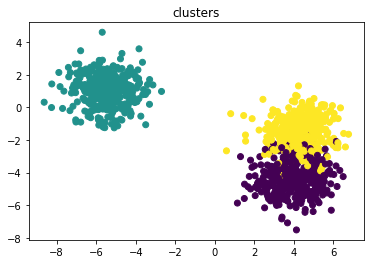

In [130]:
plt.title("clusters")
plot_cluster = plt.scatter(X[:,0], X[:,1], c = y)

<a id = "23"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas cut/qcut</p>

- Want to create bins for a continous variable use **qcut** OR **cut**

In [131]:
df = pd.DataFrame({"sales" : range(20) })
df.head()

,sales
0,0
1,1
2,2
3,3
4,4


### Qcut 
> bins the data in uniform sized cuts (basis `quantile` values)

In [132]:
df['sales_binned_qcut'] = pd.qcut(df.sales, q = 5, labels  = range(5))
df

,sales,sales_binned_qcut
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,1
8,8,2
9,9,2


### Cut
> bins the data basis `custom cuts` 

> `bins` param is used for specifying boundries

In [133]:
df['sales_binned_cut'] = pd.cut(df.sales, bins  = [-1,5, 8,15,18,20], labels = range(5))
df

,sales,sales_binned_qcut,sales_binned_cut
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,1,0
5,5,1,0
6,6,1,1
7,7,1,1
8,8,2,1
9,9,2,2


<a id = "24"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Map</p>

- Generally we have categories `encoded` as integers in a dataframe and `encoding mapping` available
- **map** lets you map the encoding to categories

In [134]:
df_encoded = pd.DataFrame({"color_code" :  [1,1,2,2,2,3,2,4,4,5]})
df_encoded

,color_code
0,1
1,1
2,2
3,2
4,2
5,3
6,2
7,4
8,4
9,5


### map using - dictionary 
- we can use `dictionary` object as the mapper

In [135]:
color_map_dict  =  {1:"white",2:"grey", 3:"green" ,4:"blue",5:"red"}

In [136]:
df_encoded["color_name_dict"] = df_encoded.color_code.map(color_map_dict)
df_encoded

,color_code,color_name_dict
0,1,white
1,1,white
2,2,grey
3,2,grey
4,2,grey
5,3,green
6,2,grey
7,4,blue
8,4,blue
9,5,red


### map using - series
- we can also use `series` object as the mapper

In [137]:
color_map_ser  =  pd.Series({1:"white",2:"grey", 3:"green" ,4:"blue",5:"red"})
color_map_ser

1    white
2     grey
3    green
4     blue
5      red
dtype: object

In [138]:
df_encoded["color_name_series"] = df_encoded.color_code.map(color_map_ser)
df_encoded

,color_code,color_name_dict,color_name_series
0,1,white,white
1,1,white,white
2,2,grey,grey
3,2,grey,grey
4,2,grey,grey
5,3,green,green
6,2,grey,grey
7,4,blue,blue
8,4,blue,blue
9,5,red,red


<a id = "25"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Sort_index</p>
- Lets you sort the dataframe on `index`

In [139]:
np.random.seed(123)

df = pd.DataFrame({"A" : range(10)}, index = np.random.randint(0,10,10))
print("original dataframe:")
display(df)

print()

print("dataframe sorted on index")
df.sort_index()

original dataframe:


,A
2,0
2,1
6,2
1,3
3,4
9,5
6,6
1,7
0,8
1,9



dataframe sorted on index


,A
0,8
1,3
1,7
1,9
2,0
2,1
3,4
6,2
6,6
9,5


<a id = "26"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">to-markdown,to-clipboard, to-dict</p>

In [140]:
df = pd.DataFrame({"A" : [1,2,3,4], "B" : list("abcd")})
df

,A,B
0,1,a
1,2,b
2,3,c
3,4,d


### df.to_dict

- Convert the DataFrame to a dictionary.

- The type of the key-value pairs can be customized with the parameters (see below).

> `orient = {‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’}`

In [141]:
df.to_dict(orient = "dict")

{'A': {0: 1, 1: 2, 2: 3, 3: 4}, 'B': {0: 'a', 1: 'b', 2: 'c', 3: 'd'}}

### df.to_markdown
- Print DataFrame in `Markdown-friendly` format

In [142]:
print(df.to_markdown())

|    |   A | B   |
|---:|----:|:----|
|  0 |   1 | a   |
|  1 |   2 | b   |
|  2 |   3 | c   |
|  3 |   4 | d   |


### df.to_clipboard

`Please use the below command on local system because it pastes dataframe in system clipbaord`
- Run the below command. Then simply run `paste(ctrl + v) into Excel`, you will get the dataframe

- This let's you avoid downloaing dataframe again & again (pls use for small dataframes)
-----------------------

- Bonus tip : copy table from a excel file and call **pd.from_clipboard()** to get table(copied) as a Dataframe 

In [143]:
# df.to_clipboard()

<a id = "27"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🎯Flattening a python list</p>

- Not a pandas trick, but very important one!

In [144]:
print("using sum")
arr = [[1,2],[3,4]]
sum(arr, [])

using sum


[1, 2, 3, 4]

In [145]:
print("using np.ravel")
arr = [[1,2],[3,4]]
list(np.ravel(arr))

using np.ravel


[1, 2, 3, 4]

In [146]:
print("using itertools")

import itertools
arr = [[1,2],[3,4]]
chain = itertools.chain(*arr)
list(chain)

using itertools


[1, 2, 3, 4]

<a id = "28"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Append</p>

- we all know that list has a append method.
- Dataframe too has one!

In [147]:
df = pd.DataFrame()

for a,b in zip(range(10) , np.random.rand(10)):
    df = df.append({"A" :a,
                    "B" : b},
                   ignore_index = True)

df

,A,B
0,0.0,0.480932
1,1.0,0.392118
2,2.0,0.343178
3,3.0,0.729050
4,4.0,0.438572
5,5.0,0.059678
6,6.0,0.398044
7,7.0,0.737995
8,8.0,0.182492
9,9.0,0.175452


<a id = "29"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">⚕️String vs object vs Category dtype</p>

In [148]:
df = pd.DataFrame({"A" : [1,2.5,"a","B"]} )
df

,A
0,1
1,2.5
2,a
3,B


### Object dtype
- This is the `default` datatype 
- Can handle `mixed dtype` elements

In [149]:
# object series
obj_ser = df.A

print("defualt - object dtype : can hold mixed dtypes")
{x:type(x) for x in obj_ser}

defualt - object dtype : can hold mixed dtypes


{1: int, 2.5: float, 'a': str, 'B': str}

### String dtype

- This is still in `beta phase`
- String dtype keeps dtypes `homogeneous` across the data
- It does not allow for `mixed` dtypes

--------------
- As of now `string` dtype does not provide much `memory-optimization` compared to `object`

> more about `string` dtype : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [150]:
str_ser = df.A.astype("string")

print("string dtype : can hold only string dtypes for each element")
{x:type(x) for x in str_ser}

string dtype : can hold only string dtypes for each element


{'1': str, '2.5': str, 'a': str, 'B': str}

### Category dtype

- categorical variable takes on a `limited`, and usually `fixed`, number of possible values

In [151]:
cat_val = pd.Series(["p", 1, "c", "d"], dtype="category")
cat_val

0    p
1    1
2    c
3    d
dtype: category
Categories (4, object): [1, 'c', 'd', 'p']

- categorical data can have order which is defined by the `order of categories`, **not** ` lexical order` of the values.

In [152]:
print("categorical variable sorted based on order of categories")
cat_val.sort_values()

categorical variable sorted based on order of categories


1    1
2    c
3    d
0    p
dtype: category
Categories (4, object): [1, 'c', 'd', 'p']

<a id = "30"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🔥 Fuguesql : SQL in pandas</p>

- `FugueSQL` lets you use `SQL` interface in  `Pandas, Dask, and Spark`

------------------
- This is a vast topic to cover here, I will leave you with all references links 
- fugue project page: https://github.com/fugue-project/fugue
- `fugue-sql for spark-dataframes` : https://medium.com/plumbersofdatascience/using-fuguesql-on-spark-dataframes-with-databricks-ab4ffc419c3e

------------------------
------------------------

**pandasql : alternatives to Fuguesql**
- https://stackoverflow.com/questions/45865608/executing-an-sql-query-over-a-pandas-dataset/45866311
- https://www.analyticsvidhya.com/blog/2021/07/pandasql-best-way-to-run-sql-queries-and-codes-in-jupyter-notebook-using-python/

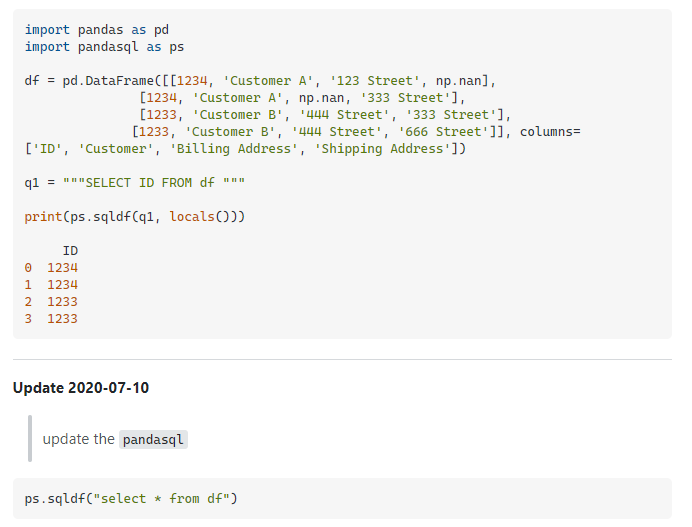


------------------------
------------------------

### Back to Fuguesql

- **fuggle** is a library for Fugue on `Kaggle notebooks` 
- Installating fugue for use outside Kaggle notebooks should just be `pip install fugue`

> ref: https://www.kaggle.com/kvnkho/fugue-workshop

In [153]:
%pip install fuggle -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl 1.5.0 requires pyarrow<6,>=1, but you have pyarrow 6.0.1 which is incompatible.
tfx-bsl 1.5.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,<3,>=1.15.2, but you have tensorflow 2.6.2 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires pyarrow<6,>=1, but you have pyarrow 6.0.1 which is incompatible.
tensorflow-transform 1.

In [154]:
from fuggle import setup
setup()

In [155]:
df = pd.DataFrame({"A": [1, 2, 3, 4], "col2": list("abcd")})
df

,A,col2
0,1,a
1,2,b
2,3,c
3,4,d


- **`%%fsql magic lets you use fugue in jupyter-NB`**

In [156]:
%%fsql
SELECT * FROM df
WHERE A = 3

PRINT

,A,col2
0,3,c


- **`fsql : using python variable`**

In [157]:
# variable
cutoff  =  2

In [158]:
%%fsql
SELECT * FROM df
WHERE A > {{cutoff}}

PRINT

,A,col2
0,3,c
1,4,d


<a id = "31"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🚀Pandarallel</p>

- The idea of `Pandaral·lel` is to distribute your pandas calculation over all available CPUs on your computer to get a significant speed increase.

- **In this case we are getting 2X speed gains**
------------------

- On Windows, Pandaral·lel will works only if the Python session (python, ipython, jupyter notebook, jupyter lab, ...) is executed from `Windows Subsystem for Linux (WSL)`
- On Linux & macOS, nothing special has to be done.

---------------------
> ref: https://towardsdatascience.com/pandaral-lel-a-simple-and-efficient-tool-to-parallelize-your-pandas-operations-on-all-your-cpus-bb5ff2a409ae

> ref: https://github.com/nalepae/pandarallel

-------------------

> Why Pandarallel, why not Dask? 

> Maybe becuase it lets you use pandas like functionality. honestly, I have not explored the comparison b/w the two!

In [159]:
pip install pandarallel -q

Note: you may need to restart the kernel to use updated packages.


In [160]:
# Import
from pandarallel import pandarallel

# Initialization
pandarallel.initialize(progress_bar = True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [161]:
df_size = int(5e5)
df = pd.DataFrame(dict(a=np.random.randint(1, 8, df_size),
                       b=np.random.rand(df_size)))

df.shape

(500000, 2)

In [162]:
def func(x):
    return np.sin(x.a**2) + np.sin(x.b**2)

### Benchmark
- Let's benchmark pandas `progress_apply` to pandarallel's `parallel_apply`
- we know that kaggle kernel offer `4 cpu-cores`
-----------------
- we can observe there's a `2x` gain in performance

In [163]:
%%time
res = df.progress_apply(func, axis=1)

  0%|          | 0/500000 [00:00<?, ?it/s]

CPU times: user 20 s, sys: 227 ms, total: 20.3 s
Wall time: 20.1 s


In [164]:
%%time
res_parallel = df.parallel_apply(func, axis=1)

CPU times: user 465 ms, sys: 99.6 ms, total: 565 ms
Wall time: 8.4 s


<a id = "32"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dataframe - style </p>

- We can create beautiful dataframe outputs by using `style`
- There are a ton of customizations we can do, I leave that to you!  

In [165]:
df = pd.DataFrame({"A" :[1,2,3,5], "B" : list("pqrs")})

In [166]:
df.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,A,B
0,1,p
1,2,q
2,3,r
3,5,s


<a id = "33"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">⚡Markdown</p>

- Want your `code/print outputs` to have `beautiful formatting` like `Markdowns`

> This is a post by me only (not a self promotion). self promotion comes later😁

https://www.kaggle.com/general/302872

<a id = "34"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">☑️Searborn formatting in Matplotlib plots</p>

- `sns.set_theme()`  : lets us use `Seaborn formatting` while using `Matplotlib api` for plotting 

In [167]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [168]:
data = np.random.randn(100)

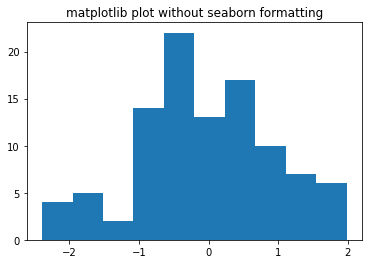

In [169]:
plt.title("matplotlib plot without seaborn formatting")
ax = plt.hist(data)

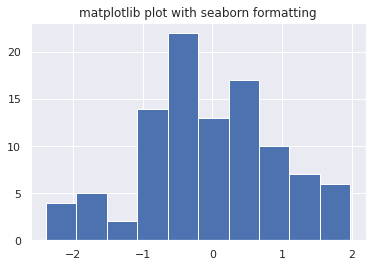

In [170]:
# Apply the default theme
sns.set_theme()

plt.title("matplotlib plot with seaborn formatting")
ax = plt.hist(data)

<a id = "35"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas profiling</p>

`pandas_profiling` can generate a basic report on the input DataFrame (useful for basic `EDA`) 

----------------

I dont recommend using `Pandas Profiling` for larger datasets

In [171]:
# importing packages
import pandas as pd
import pandas_profiling as pp


# dictionary of data
dct = {'ID': {0: 23, 1: 43, 2: 12, 3: 13,4: 67, 5: 89, 6: 90, 7: 56,8: 34},
'Name': {0: 'Ram', 1: 'Deep', 2: 'Yash',3: 'Aman', 4: 'Arjun', 5: 'Aditya',6: 'Divya', 7: 'Chalsea',8: 'Akash' },
'Marks': {0: 89, 1: 97, 2: 45, 3: 78,4: 56, 5: 76, 6: 100, 7: 87,8: 81},
'Grade': {0: 'B', 1: 'A', 2: 'F', 3: 'C',4: 'E', 5: 'C', 6: 'A', 7: 'B',8: 'B'}}

In [172]:
# forming dataframe and printing
data = pd.DataFrame(dct)
display(data)

,ID,Name,Marks,Grade
0,23,Ram,89,B
1,43,Deep,97,A
2,12,Yash,45,F
3,13,Aman,78,C
4,67,Arjun,56,E
5,89,Aditya,76,C
6,90,Divya,100,A
7,56,Chalsea,87,B
8,34,Akash,81,B


In [173]:
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [174]:
profile


<u>Need more tricks</u>
https://www.dataschool.io/python-pandas-tips-and-tricks/

---------------------
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:10px 10px;">Thanks & Feedback</p>

<div class="alert alert-info" role="alert">
<h3>Please checkout my other work too! </h3> 
</div>